<a href="https://colab.research.google.com/github/BhaaveshWaykole/Online_News_Popularity/blob/main/%3DMLR_SignatureProject_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,make_scorer,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,chi2, mutual_info_regression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OnlineNewsPopularity.csv')
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
df_no_duplicates = df.drop_duplicates()

print("\nDataFrame without Duplicates:")
print(df_no_duplicates)

Empty DataFrame
Columns: [url,  timedelta,  n_tokens_title,  n_tokens_content,  n_unique_tokens,  n_non_stop_words,  n_non_stop_unique_tokens,  num_hrefs,  num_self_hrefs,  num_imgs,  num_videos,  average_token_length,  num_keywords,  data_channel_is_lifestyle,  data_channel_is_entertainment,  data_channel_is_bus,  data_channel_is_socmed,  data_channel_is_tech,  data_channel_is_world,  kw_min_min,  kw_max_min,  kw_avg_min,  kw_min_max,  kw_max_max,  kw_avg_max,  kw_min_avg,  kw_max_avg,  kw_avg_avg,  self_reference_min_shares,  self_reference_max_shares,  self_reference_avg_sharess,  weekday_is_monday,  weekday_is_tuesday,  weekday_is_wednesday,  weekday_is_thursday,  weekday_is_friday,  weekday_is_saturday,  weekday_is_sunday,  is_weekend,  LDA_00,  LDA_01,  LDA_02,  LDA_03,  LDA_04,  global_subjectivity,  global_sentiment_polarity,  global_rate_positive_words,  global_rate_negative_words,  rate_positive_words,  rate_negative_words,  avg_positive_polarity,  min_positive_polarity,  max

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## NULL Values:  
No Data Cleaning needed as no null values needed

In [ ]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

<Axes: title={'center': 'Finding Null Values with heatmap'}>

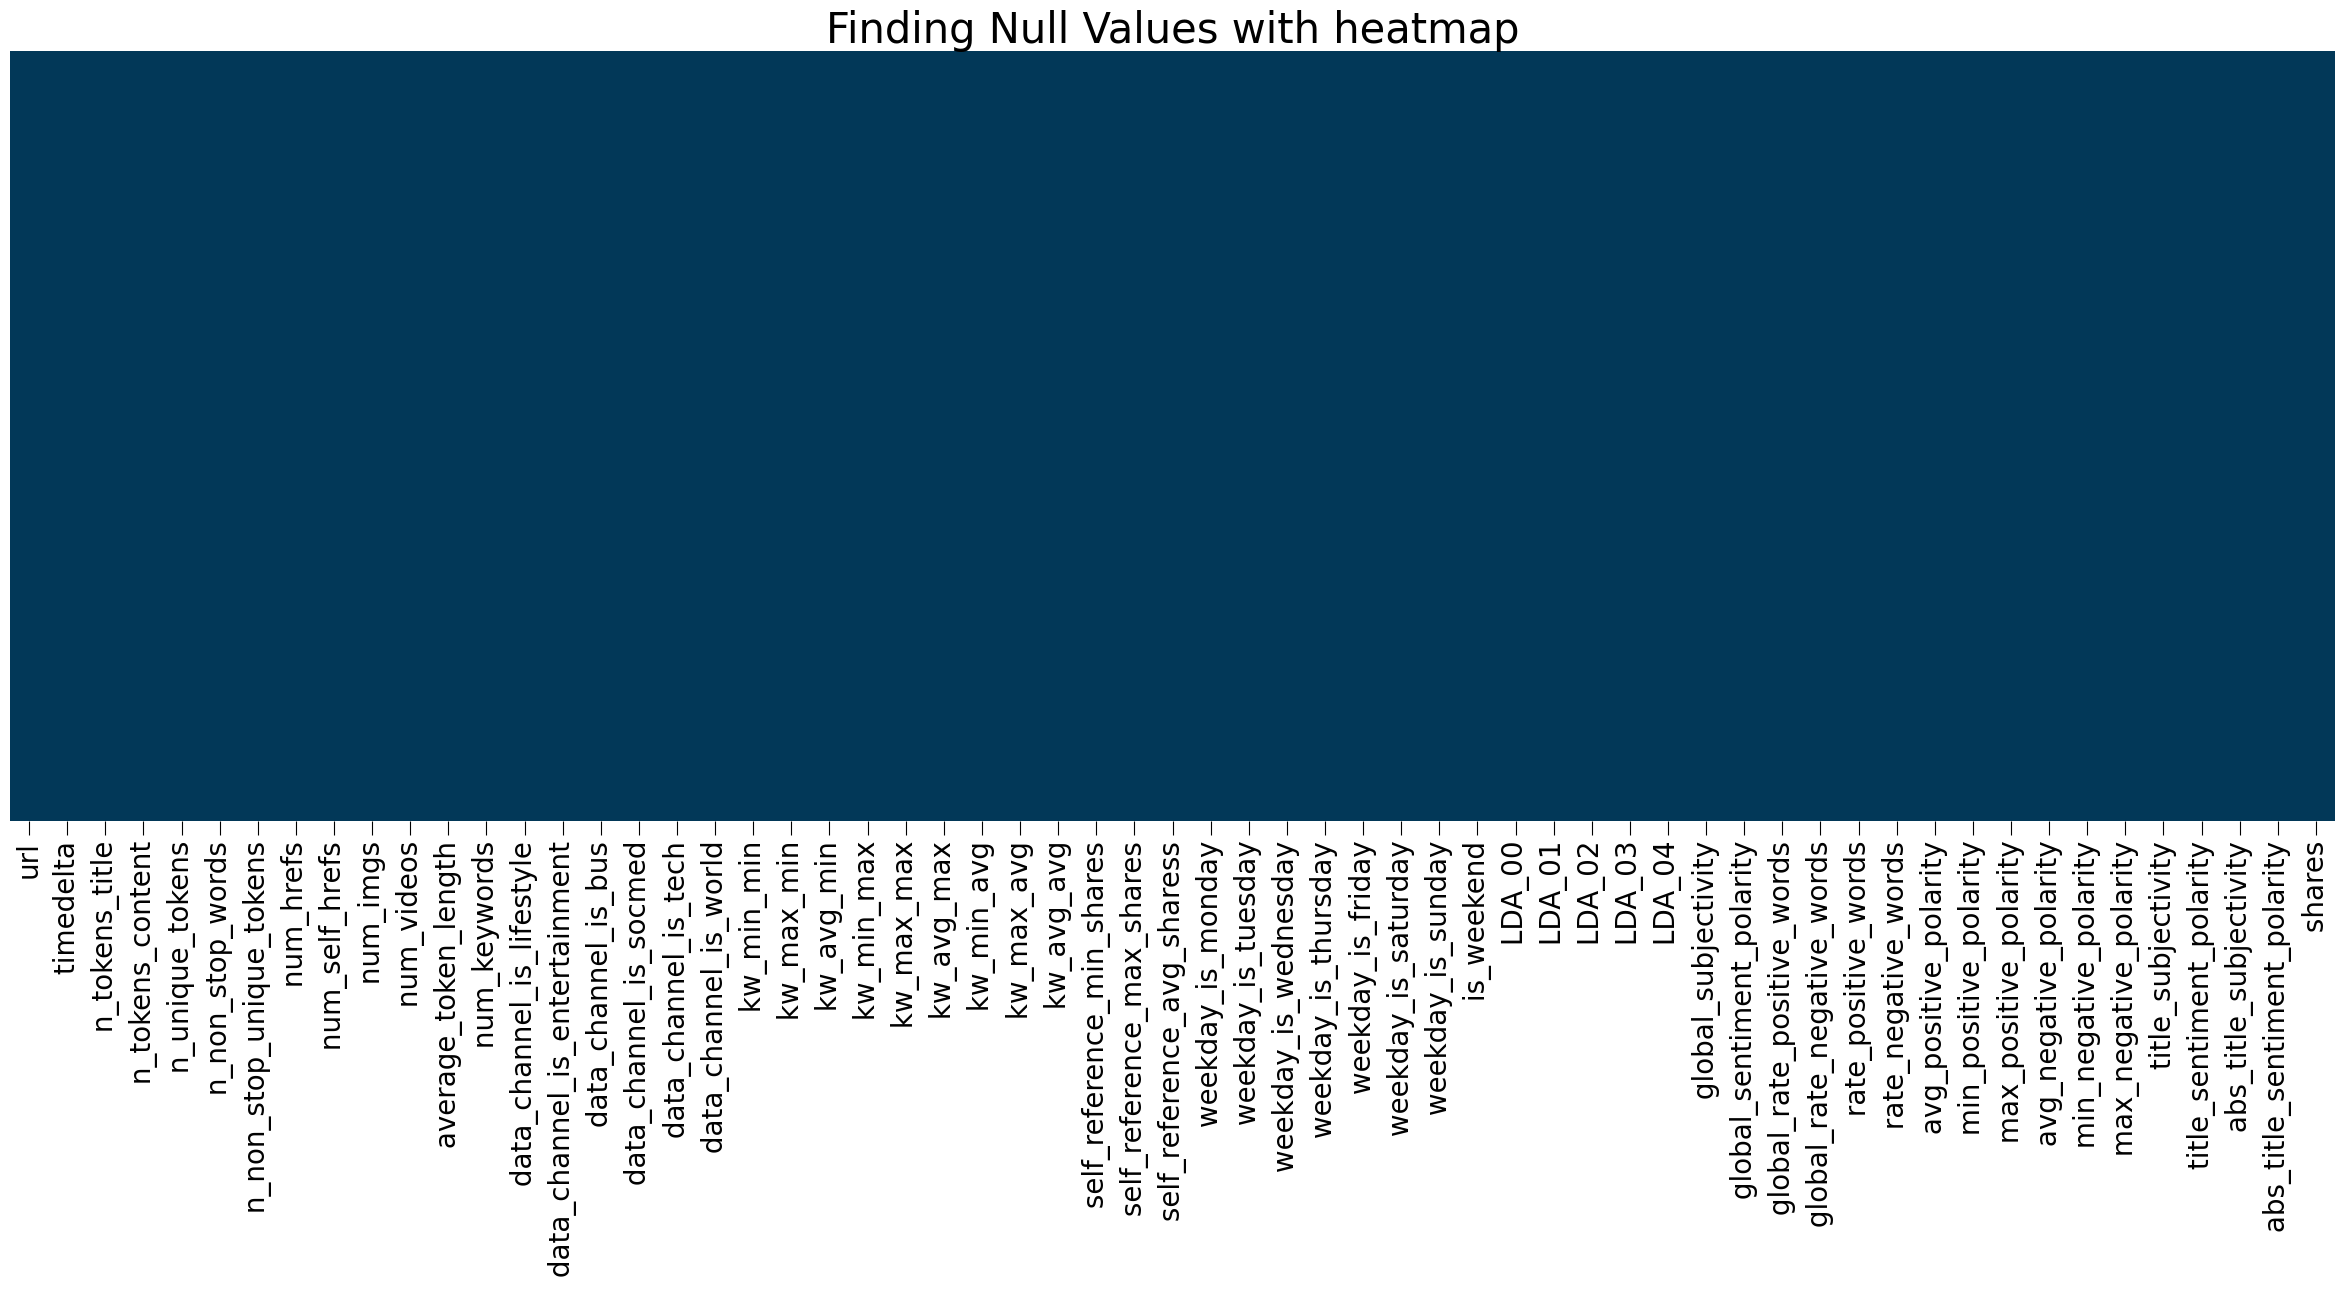

In [ ]:
#Heatmap of Null Values
plt.figure(figsize = (30,10))
plt.xticks(size=20)
plt.tick_params(size=10)

plt.title('Finding Null Values with heatmap', color = 'black', size = 30)

sns.heatmap(df.isnull(),
            yticklabels=False,#Labels on the y-axis
            cbar=False,#cbar is colorbar
            cmap='PuBu_r',# color of the map
            )

#EDA

<ipython-input-12-46cb5df3292e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

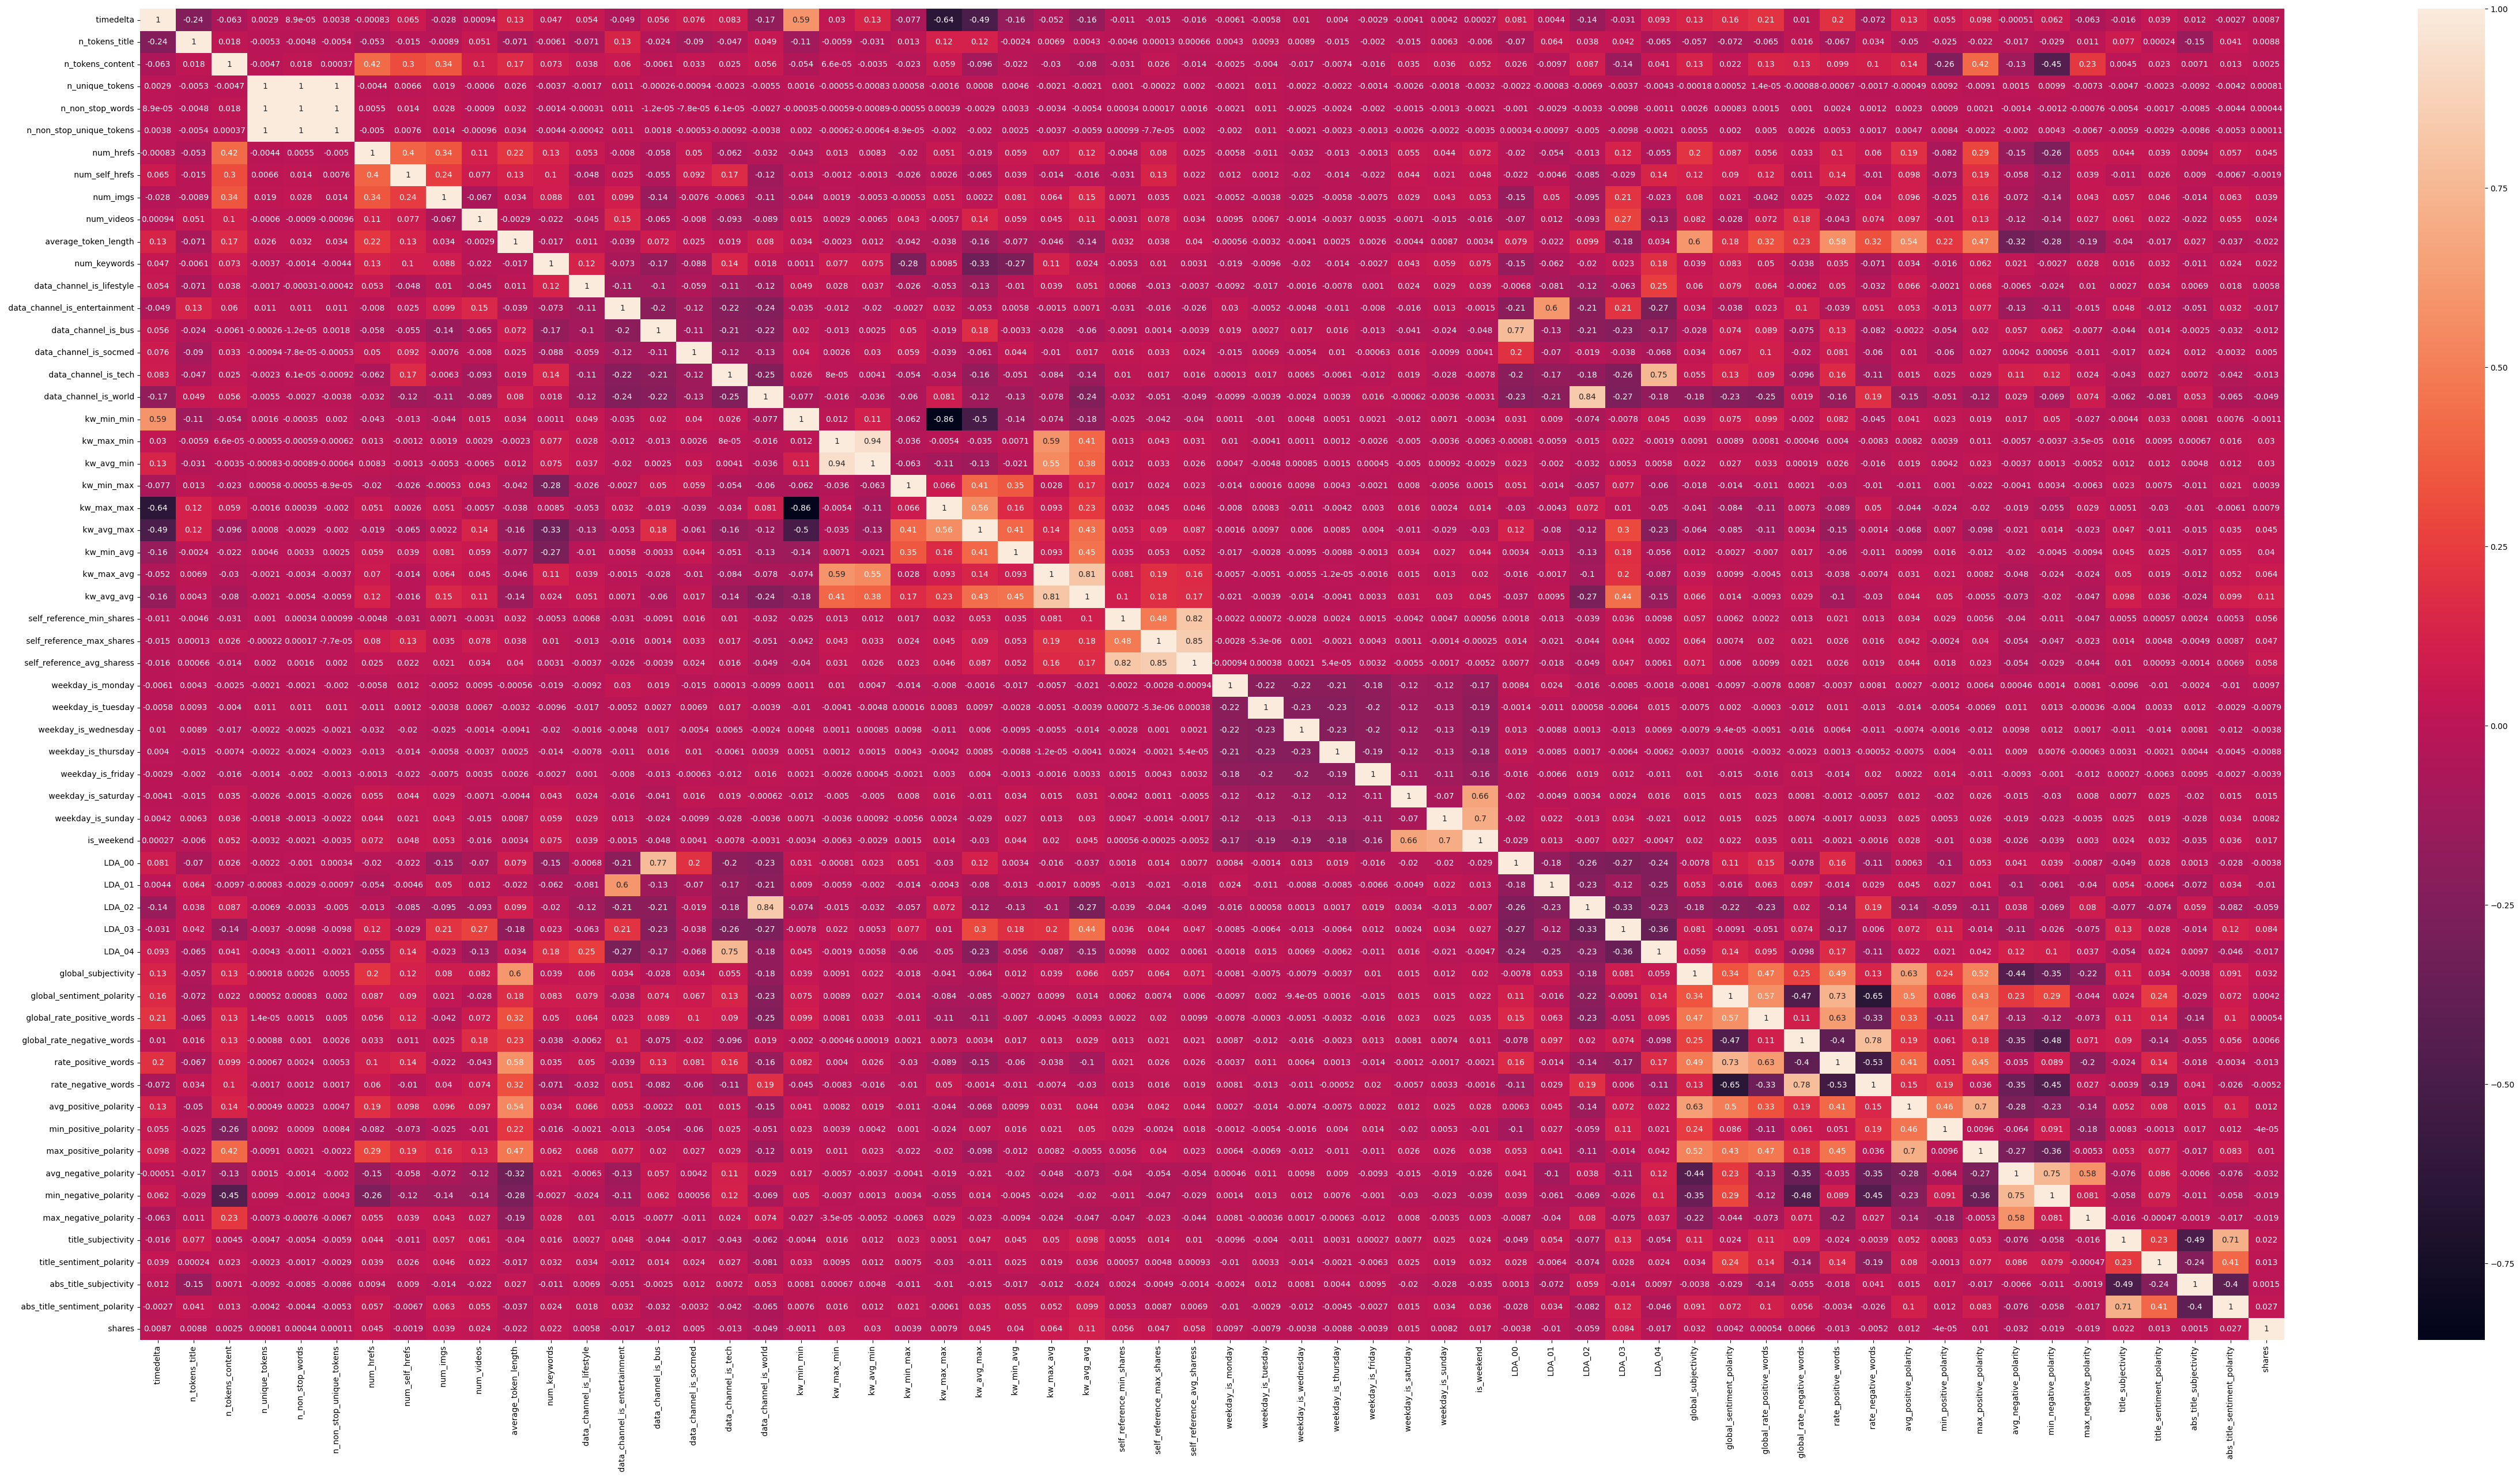

In [ ]:
#Heat Maps is to better visualize the volume of locations/events within a dataset
plt.figure(figsize=(60,30)) #fig size means the figure size
sns.heatmap(df.corr(),annot=True)
#annot only adds numeric value on the python heatmap cell

In [ ]:
corr_mat = df.corr()
corr_mat.head()

<ipython-input-13-783f89458ac3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443


In [ ]:
df1 = df
df1 = df1.drop(columns = "url")
df1.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


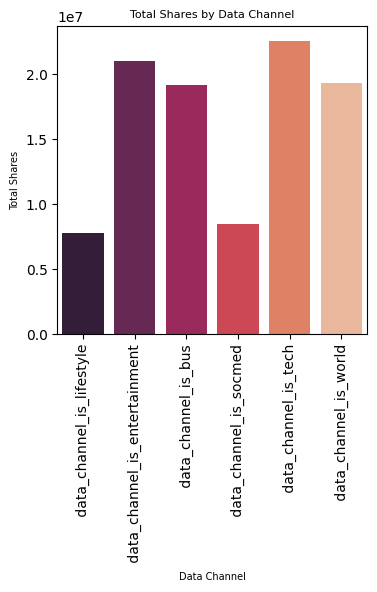

In [ ]:
# List of data channel columns
data_channel_columns = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world']

# Sum the shares for each data channel
total_shares_by_channel = df[data_channel_columns].multiply(df[' shares'], axis=0).sum()

# Create a stacked bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=total_shares_by_channel.index, y=total_shares_by_channel.values, palette='rocket')
plt.title('Total Shares by Data Channel', fontsize=8)
plt.xlabel('Data Channel', fontsize=7)
plt.ylabel('Total Shares', fontsize=7)
plt.xticks(rotation=90)
plt.show()

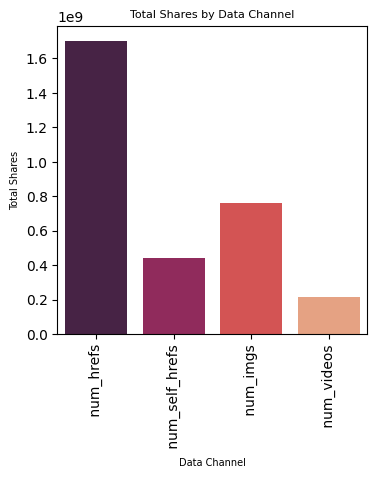

In [ ]:
# List of data channel columns
data_channel_columns = [' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']

# Sum the shares for each data channel
total_shares_by_channel = df[data_channel_columns].multiply(df[' shares'], axis=0).sum()

# Create a stacked bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=total_shares_by_channel.index, y=total_shares_by_channel.values, palette='rocket')
plt.title('Total Shares by Data Channel', fontsize=8)
plt.xlabel('Data Channel', fontsize=7)
plt.ylabel('Total Shares', fontsize=7)
plt.xticks(rotation=90)
plt.show()

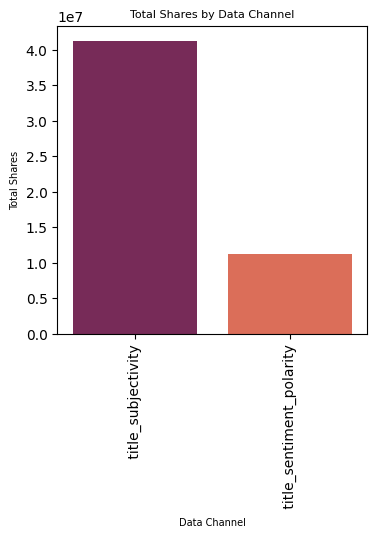

In [ ]:
data_channel_columns = [' title_subjectivity', ' title_sentiment_polarity']

# Sum the shares for each data channel
total_shares_by_channel = df[data_channel_columns].multiply(df[' shares'], axis=0).sum()

# Create a stacked bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=total_shares_by_channel.index, y=total_shares_by_channel.values, palette='rocket')
plt.title('Total Shares by Data Channel', fontsize=8)
plt.xlabel('Data Channel', fontsize=7)
plt.ylabel('Total Shares', fontsize=7)
plt.xticks(rotation=90)
plt.show()

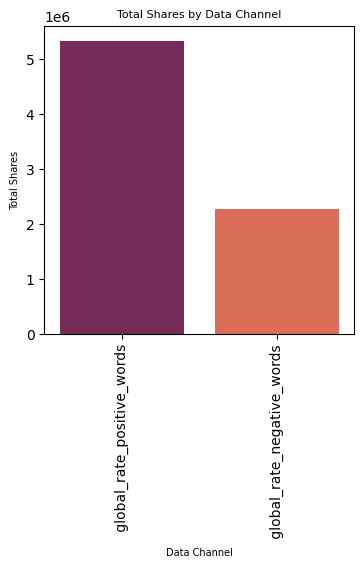

In [ ]:
data_channel_columns = [' global_rate_positive_words', ' global_rate_negative_words']

# Sum the shares for each data channel
total_shares_by_channel = df[data_channel_columns].multiply(df[' shares'], axis=0).sum()

# Create a stacked bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=total_shares_by_channel.index, y=total_shares_by_channel.values, palette='rocket')
plt.title('Total Shares by Data Channel', fontsize=8)
plt.xlabel('Data Channel', fontsize=7)
plt.ylabel('Total Shares', fontsize=7)
plt.xticks(rotation=90)
plt.show()

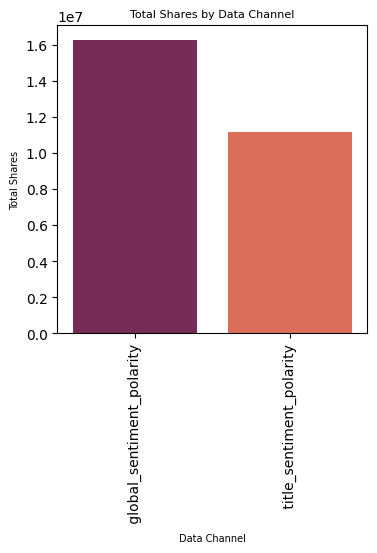

In [ ]:
data_channel_columns = [' global_sentiment_polarity', ' title_sentiment_polarity']

# Sum the shares for each data channel
total_shares_by_channel = df[data_channel_columns].multiply(df[' shares'], axis=0).sum()

# Create a stacked bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=total_shares_by_channel.index, y=total_shares_by_channel.values, palette='rocket')
plt.title('Total Shares by Data Channel', fontsize=8)
plt.xlabel('Data Channel', fontsize=7)
plt.ylabel('Total Shares', fontsize=7)
plt.xticks(rotation=90)
plt.show()

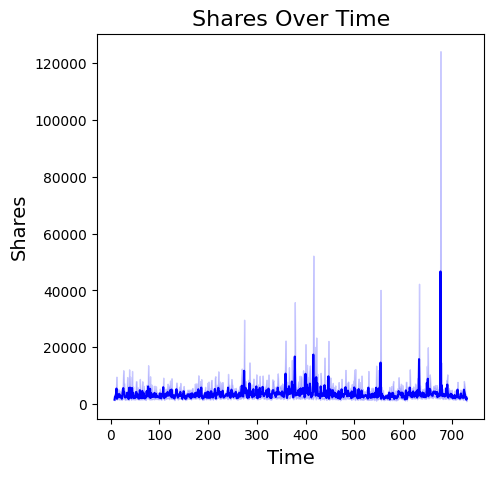

In [ ]:
# Time series plot of shares over time
plt.figure(figsize=(5,5))
sns.lineplot(data=df, x=' timedelta', y=' shares', color='blue')
plt.title('Shares Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Shares', fontsize=14)
plt.show()


#Feature Selection using SKlearn

In [ ]:
X = df1.drop(' shares', axis=1)
y = df1[' shares']

k = 5  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print(f"Selected features: {selected_features}")

Selected features: Index([' timedelta', ' kw_max_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' LDA_02'],
      dtype='object')


In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
# feature_df = df1[selected_features]
# feature_df.append(y)
df1[selected_features]

,timedelta,kw_max_avg,self_reference_min_shares,self_reference_max_shares,LDA_02
0,731.0,0.000000,496.0,496.0,0.040005
1,731.0,0.000000,0.0,0.0,0.050096
2,731.0,0.000000,918.0,918.0,0.033351
3,731.0,0.000000,0.0,0.0,0.494651
4,731.0,0.000000,545.0,16000.0,0.028575
...,...,...,...,...,...
39639,8.0,4004.342857,11400.0,48000.0,0.151701
39640,8.0,5470.168651,2100.0,2100.0,0.231866
39641,8.0,6880.687034,1400.0,1400.0,0.025207
39642,8.0,3384.316871,452.0,452.0,0.839987


In [ ]:
X = df1.drop(' shares', axis=1)
y = df1[' shares']

k = 8  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features_8 = X.columns[selected_feature_indices]
print(f"Selected features: {selected_features_8}")

Selected features: Index([' timedelta', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_02'],
      dtype='object')


In [ ]:
df1[selected_features_8]

,timedelta,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_02
0,731.0,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.040005
1,731.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.050096
2,731.0,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.033351
3,731.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.494651
4,731.0,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028575
...,...,...,...,...,...,...,...,...
39639,8.0,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.151701
39640,8.0,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.231866
39641,8.0,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.025207
39642,8.0,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.839987


#Standardization

In [ ]:
# scaler = StandardScaler()

# scaler.fit(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02', ' shares']])

# # standardized_data = scaler.transform(df1[[' timedelta', ' kw_max_avg', ' LDA_02', ' shares']])
# standardized_data = scaler.transform(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02', ' shares']])

# # print(standardized_data)
# df2 = pd.DataFrame(standardized_data)
# df2.columns = [' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02', ' shares']
# df2

,timedelta,kw_max_avg,kw_avg_avg,self_reference_max_shares,LDA_02,shares
0,1.757880,-0.927595,-2.379014,-0.239676,-0.624921,-0.241028
1,1.757880,-0.927595,-2.379014,-0.251766,-0.589153,-0.230879
2,1.757880,-0.927595,-2.379014,-0.229390,-0.648502,-0.163018
3,1.757880,-0.927595,-2.379014,-0.251766,0.986490,-0.188821
4,1.757880,-0.927595,-2.379014,0.138221,-0.665431,-0.248596
...,...,...,...,...,...,...
39639,-1.618083,-0.271016,-0.079463,0.918194,-0.229033,-0.137216
39640,-1.618083,-0.030669,0.209237,-0.200580,0.055097,-0.128615
39641,-1.618083,0.200609,0.812194,-0.217642,-0.677368,-0.128615
39642,-1.618083,-0.372679,-1.030216,-0.240749,2.210472,-0.197421


In [ ]:
# Create a StandardScaler for the columns you want to standardize together
scaler1 = StandardScaler()
scaler1.fit(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02']])

# Create a StandardScaler for the 'shares' column
scaler2 = StandardScaler()
scaler2.fit(df1[[' shares']])

# Standardize the columns using scaler1
standardized_data1 = scaler1.transform(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02']])

# Standardize the 'shares' column using scaler2
standardized_data2 = scaler2.transform(df1[[' shares']])

# Combine the standardized data into a DataFrame
df2 = pd.DataFrame({
    'timedelta': standardized_data1[:, 0],
    'kw_max_avg': standardized_data1[:, 1],
    'kw_avg_avg': standardized_data1[:, 2],
    'self_reference_max_shares': standardized_data1[:, 3],
    'LDA_02': standardized_data1[:, 4],
    'shares': standardized_data2[:, 0]
})

df2
# df2 now contains the standardized data with 'shares' standardized separately.

,timedelta,kw_max_avg,kw_avg_avg,self_reference_max_shares,LDA_02,shares
0,1.757880,-0.927595,-2.379014,-0.239676,-0.624921,-0.241028
1,1.757880,-0.927595,-2.379014,-0.251766,-0.589153,-0.230879
2,1.757880,-0.927595,-2.379014,-0.229390,-0.648502,-0.163018
3,1.757880,-0.927595,-2.379014,-0.251766,0.986490,-0.188821
4,1.757880,-0.927595,-2.379014,0.138221,-0.665431,-0.248596
...,...,...,...,...,...,...
39639,-1.618083,-0.271016,-0.079463,0.918194,-0.229033,-0.137216
39640,-1.618083,-0.030669,0.209237,-0.200580,0.055097,-0.128615
39641,-1.618083,0.200609,0.812194,-0.217642,-0.677368,-0.128615
39642,-1.618083,-0.372679,-1.030216,-0.240749,2.210472,-0.197421


In [ ]:
# X = df2[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares' , ' LDA_02']]
X = df2[['timedelta','kw_max_avg','kw_avg_avg','self_reference_max_shares','LDA_02']]
y=df2[['shares']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression object
std_model = LinearRegression()

# Fit the model to the training data
std_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = std_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2_score_value = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print('Mean squared error:', mse)
print('R-squared score:', r2_score_value)

Mean squared error: 0.8743081737024112
R-squared score: 0.020556623027627285


In [ ]:
# print('Training Accuracy', std_model.score(X_train, y_train))
# print('\n')
# print('Testing Accuracy', std_model.score(X_test, y_test))
print("Train: ", std_model.score(X_train, y_train))
print("Test: ", std_model.score(X_test, y_test))

Train:  0.015274765978087745
Test:  0.020556623027627285


In [ ]:
X = df2[['timedelta','kw_max_avg','kw_avg_avg','self_reference_max_shares','LDA_02']]
y=df2[['shares']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
regressor_std = DecisionTreeRegressor(max_depth = 3, min_samples_leaf=5)

# Fit the model to the training data
regressor_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.8721711698935057
R-squared (R2) Score: 0.022950600677788868


In [ ]:
print(regressor_std.score(X_train, y_train))
print(regressor_std.score(X_test, y_test))

0.02091559383063668
0.022950600677788868


In [ ]:
from sklearn.linear_model import Ridge
X = df2[['timedelta','kw_max_avg','kw_avg_avg','self_reference_max_shares','LDA_02']]
y=df2[['shares']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
alpha = 1.0 # Regularization strength (adjust as needed)
ridge_model_std = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.8743084226578501
R-squared (R2) Score: 0.020556344135397753


In [ ]:
print(ridge_model_std.score(X_train, y_train))
print(ridge_model_std.score(X_test, y_test))

0.015274765794159317
0.020556344135397753


#Standardization on features by SKlearn -> 8 features -->> number of features by Annova


In [ ]:
# scaler = StandardScaler()

# scaler.fit(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_02', ' shares']])

# # standardized_data = scaler.transform(df1[[' timedelta', ' kw_max_avg', ' LDA_02', ' shares']])
# standardized_data = scaler.transform(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',
#        ' self_reference_min_shares', ' self_reference_max_shares',
#        ' self_reference_avg_sharess', ' LDA_00', ' LDA_02', ' shares']])

# # print(standardized_data)
# df5 = pd.DataFrame(standardized_data)
# df5.columns = [' timedelta', ' kw_max_avg', ' kw_avg_avg',
#        ' self_reference_min_shares', ' self_reference_max_shares',
#        ' self_reference_avg_sharess', ' LDA_00', ' LDA_02', ' shares']
# df5

,timedelta,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_02,shares
0,1.757880,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,1.200633,-0.624921,-0.241028
1,1.757880,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.339253,-0.589153,-0.230879
2,1.757880,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,0.126224,-0.648502,-0.163018
3,1.757880,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,-0.593319,0.986490,-0.188821
4,1.757880,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,-0.593092,-0.665431,-0.248596
...,...,...,...,...,...,...,...,...,...
39639,-1.618083,-0.271016,-0.079463,0.374966,0.918194,1.265194,-0.606763,-0.229033,-0.137216
39640,-1.618083,-0.030669,0.209237,-0.096196,-0.200580,-0.177675,-0.590370,0.055097,-0.128615
39641,-1.618083,0.200609,0.812194,-0.131660,-0.217642,-0.206588,-0.097328,-0.677368,-0.128615
39642,-1.618083,-0.372679,-1.030216,-0.179688,-0.240749,-0.245743,-0.549852,2.210472,-0.197421


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a StandardScaler for the columns you want to standardize together
scaler1 = StandardScaler()
scaler1.fit(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_02']])

# Create a StandardScaler for the 'shares' column
scaler2 = StandardScaler()
scaler2.fit(df1[[' shares']])

# Standardize the columns using scaler1
standardized_data1 = scaler1.transform(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_02']])

# Standardize the 'shares' column using scaler2
standardized_data2 = scaler2.transform(df1[[' shares']])

# Combine the standardized data into a DataFrame
df5 = pd.DataFrame({
    'timedelta': standardized_data1[:, 0],
    'kw_max_avg': standardized_data1[:, 1],
    'kw_avg_avg': standardized_data1[:, 2],
    'self_reference_min_shares': standardized_data1[:, 3],
    'self_reference_max_shares': standardized_data1[:, 4],
    'self_reference_avg_sharess': standardized_data1[:, 5],
    'LDA_00': standardized_data1[:, 6],
    'LDA_02': standardized_data1[:, 7],
    'shares': standardized_data2[:, 0]
})

# df5 now contains the standardized data with 'shares' standardized separately.


In [ ]:
# X = df2[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares' , ' LDA_02']]
X = df5[['timedelta', 'kw_max_avg', 'kw_avg_avg','self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_02']]
y = df5[['shares']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression object
std_model = LinearRegression()

# Fit the model to the training data
std_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = std_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2_score_value = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print('Mean squared error:', mse)
print('R-squared score:', r2_score_value)

Mean squared error: 0.871078374154197
R-squared score: 0.02417480466151367


In [ ]:
print(std_model.score(X_train, y_train))
print(std_model.score(X_test, y_test))

0.015915560143460294
0.02417480466151367


In [ ]:
X = df5[['timedelta', 'kw_max_avg', 'kw_avg_avg','self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_02']]
y = df5[['shares']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
regressor_std = DecisionTreeRegressor(max_depth = 3, min_samples_leaf=5)

# Fit the model to the training data
regressor_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.8746093046405803
R-squared (R2) Score: 0.02021928121628158


In [ ]:
print(regressor_std.score(X_train, y_train))
print(regressor_std.score(X_test, y_test))

0.022018253113102793
0.02021928121628158


In [ ]:
from sklearn.linear_model import Ridge
X = df5[['timedelta', 'kw_max_avg', 'kw_avg_avg','self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_02']]
y = df5[['shares']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
alpha = 1.0 # Regularization strength (adjust as needed)
ridge_model_std = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.8710785452286078
R-squared (R2) Score: 0.0241746130154743


In [ ]:
print(ridge_model_std.score(X_train, y_train))
print(ridge_model_std.score(X_test, y_test))

0.01591555990985949
0.0241746130154743


#Normalization

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02', ' shares']])

# Step 3: Transform your dataset to normalize it
normalized_data = scaler.transform(df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02', ' shares']])

# print("\nNormalized Data (Min-Max Scaling):")
# print(normalized_data)
df3 = pd.DataFrame(normalized_data)
df3.columns = [' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02', ' shares']
df3

,timedelta,kw_max_avg,kw_avg_avg,self_reference_max_shares,LDA_02,shares
0,1.0,0.000000,0.000000,0.000588,0.043483,0.000702
1,1.0,0.000000,0.000000,0.000000,0.054453,0.000842
2,1.0,0.000000,0.000000,0.001089,0.036252,0.001778
3,1.0,0.000000,0.000000,0.000000,0.537664,0.001422
4,1.0,0.000000,0.000000,0.018973,0.031060,0.000598
...,...,...,...,...,...,...
39639,0.0,0.013419,0.069573,0.056919,0.164893,0.002133
39640,0.0,0.018332,0.078307,0.002490,0.252029,0.002252
39641,0.0,0.023059,0.096550,0.001660,0.027399,0.002252
39642,0.0,0.011342,0.040808,0.000536,0.913031,0.001303


In [ ]:
# Split the data into training and testing sets
X = df3[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02']]
y = df3[[' shares']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create a LinearRegression object
norm_model = LinearRegression()

# Fit the model to the training data
norm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = norm_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2_score_value = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print('Mean squared error:', mse)
print('R-squared score:', r2_score_value)

Mean squared error: 0.000166196578422432
R-squared score: 0.020556623027627285


In [ ]:
print(norm_model.score(X_train, y_train))
print(norm_model.score(X_test, y_test))

0.015274765978087856
0.020556623027627285


#TRY and Apply ANNOVA test NOW:  


In [ ]:
print(df1.shape)

(39644, 60)


In [ ]:
##############  TEMPLATE  #########################################
# One-way ANOVA to check for sample independence

# H0: Sample means are identical, no difference in samples
# H1: Samples means are non identical, statistically sig. difference in samples.

# s1 = df[df[' data_channel_is_lifestyle'] == 1][' shares']
# s2 = df[df[' data_channel_is_lifestyle'] == 0][' shares']

import scipy
from scipy.stats import f_oneway
from scipy import stats
df_ann = df1
p_values = {}

for column in df_ann:
    # Get the unique group values in the column
    unique_groups = df_ann[column].unique()

    # List to store data for each group
    group_data = []

    # Collect data for each group
    for group in unique_groups:
        group_data.append(df_ann[df_ann[column] == group][' shares'])

    # Perform the one-way ANOVA test
    f_statistic, p_value = stats.f_oneway(*group_data)

    # Store the p-value in the dictionary
    p_values[column] = p_value

# Filter significant columns based on p-value threshold (e.g., 0.5)
significant_columns = [col for col, p_val in p_values.items() if p_val >= 0.5]
df_filtered = df_ann[significant_columns]

# for i in df_ann:
#   s1 = df_ann[df_ann[i] == 1][' shares']
#   s2 = df_ann[df_ann[i] == 0][' shares']
#   print(f_oneway(s1,s2)
#   a,b = f_oneway(s1,s2)
#   if b < 0.5:
#     df_ann.drop(columns = i)
# df_ann




/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
df_ann[significant_columns]

,n_tokens_title,n_unique_tokens,n_non_stop_unique_tokens,num_self_hrefs,kw_min_min,kw_min_max,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,0.663594,0.815385,2.0,0.0,0.0,0.500000,-0.187500,0.000000,0.187500
1,9.0,0.604743,0.791946,1.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000
2,9.0,0.575130,0.663866,1.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000
3,9.0,0.503788,0.665635,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000
4,13.0,0.415646,0.540890,19.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...
39639,11.0,0.529052,0.684783,7.0,-1.0,26900.0,0.100000,0.000000,0.400000,0.000000
39640,12.0,0.696296,0.885057,7.0,-1.0,6500.0,0.300000,1.000000,0.200000,1.000000
39641,10.0,0.516355,0.644128,1.0,-1.0,6200.0,0.454545,0.136364,0.045455,0.136364
39642,6.0,0.539493,0.692661,1.0,-1.0,0.0,0.000000,0.000000,0.500000,0.000000


In [ ]:
print(significant_columns)

[' n_tokens_title', ' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_self_hrefs', ' kw_min_min', ' kw_min_max', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity']


In [ ]:
df_annova = df_filtered.drop(columns = [' n_tokens_title', ' n_unique_tokens', ' n_non_stop_unique_tokens'])
print(df_annova.columns)

Index([' num_self_hrefs', ' kw_min_min', ' kw_min_max', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],
      dtype='object')


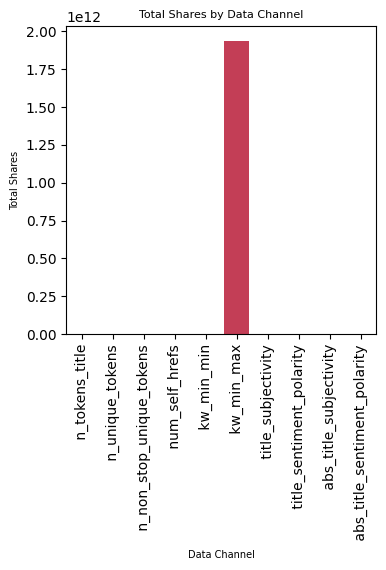

In [ ]:
# Sum the shares for each data channel
total_shares_by_channel = df[significant_columns].multiply(df[' shares'], axis=0).sum()

# Create a stacked bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=total_shares_by_channel.index, y=total_shares_by_channel.values, palette='rocket')
plt.title('Total Shares by Data Channel', fontsize=8)
plt.xlabel('Data Channel', fontsize=7)
plt.ylabel('Total Shares', fontsize=7)
plt.xticks(rotation=90)
plt.show()

In [ ]:
scaler = StandardScaler()

scaler.fit(df_annova)

# standardized_data = scaler.transform(df1[[' timedelta', ' kw_max_avg', ' LDA_02', ' shares']])
standardized_data = scaler.transform(df_annova)

# print(standardized_data)
df_std_ann = pd.DataFrame(standardized_data)
df_std_ann.columns = df_annova.columns
df_std_ann

,num_self_hrefs,kw_min_min,kw_min_max,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.335566,-0.374924,-0.234755,0.671245,-0.975432,-1.810719,0.138920
1,-0.594963,-0.374924,-0.234755,-0.870807,-0.269076,0.837749,-0.689658
2,-0.594963,-0.374924,-0.234755,-0.870807,-0.269076,0.837749,-0.689658
3,-0.854360,-0.374924,-0.234755,-0.870807,-0.269076,0.837749,-0.689658
4,4.074185,-0.374924,-0.234755,0.531059,0.244637,-1.569949,-0.087056
...,...,...,...,...,...,...,...
39639,0.961420,-0.389285,0.229155,-0.562396,-0.269076,0.308055,-0.689658
39640,0.961420,-0.389285,-0.122658,0.054425,3.498156,-0.751332,3.729424
39641,-0.594963,-0.389285,-0.127832,0.531059,0.244637,-1.569949,-0.087056
39642,-0.594963,-0.389285,-0.234755,-0.870807,-0.269076,0.837749,-0.689658


##Linear Regression on features from Annova Test :


In [ ]:
# X = df2[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares' , ' LDA_02']]
X = df_std_ann
y = df2['shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LinearRegression object
ann_mod = LinearRegression()

# Fit the model to the training data
ann_mod.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ann_mod.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2_score_value = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print('Mean squared error:', mse)
print('R-squared score:', r2_score_value)

Mean squared error: 1.273090264880288
R-squared score: 0.0009137453387420003


In [ ]:
print("Train: ", ann_mod.score(X_train, y_train))
print("Test: ", ann_mod.score(X_test, y_test))

Train:  0.000975080738928491
Test:  0.0009137453387420003


##Decision Tree on features from Annova Test :


In [ ]:
X = df_std_ann # Replace 'target_column' with your target variable name
y = df2['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor model
regressor_std = DecisionTreeRegressor(max_depth = 2, min_samples_leaf=5)

# Fit the model to the training data
regressor_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.273497473704422
R-squared (R2) Score: 0.0005941790438829253


In [ ]:
print("Train: ", ann_mod.score(X_train, y_train))
print("Test: ",ann_mod.score(X_test, y_test))

Train:  0.000975080738928491
Test:  0.0009137453387420003


##Ridge Regression on features from Annova Test :


In [ ]:
from sklearn.linear_model import Ridge
X = df_std_ann  # Replace 'target_column' with your target variable name
y = df2['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
alpha = 1.0 # Regularization strength (adjust as needed)
ridge_model_std = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.8919735070972031
R-squared (R2) Score: 0.0007670404571377132


In [ ]:
print("Train: ", ann_mod.score(X_train, y_train))
print("Test: ", ann_mod.score(X_test, y_test))

Train:  0.0009782174246707465
Test:  0.0008285512264926131


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have a DataFrame 'df' with your data and a target column 'target'

# Split the data into features and target
X =  df_std_ann   # Replace 'target_column' with your target variable name
y = df2['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso = Lasso(alpha=0.001)  # You can adjust the alpha parameter for regularization strength

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

Mean Squared Error: 0.8919791954003646
R-squared (R^2): 0.0007606681378281577


In [ ]:
print("Train: ", lasso.score(X_train, y_train))
print("Test: " ,lasso.score(X_test, y_test))

Train:  0.0010498098804510025
Test:  0.0007606681378281577


#Decision Tree on feature selected from SKLEARN  
k = 5 -> 5 features

In [ ]:
X = df2.drop('shares', axis=1)  # Replace 'target_column' with your target variable name
y = df2['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor model
regressor_std = DecisionTreeRegressor(max_depth = 3, min_samples_leaf=5)

# Fit the model to the training data
regressor_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1.2625192709818902
R-squared (R2) Score: 0.009209570853510596


In [ ]:
print("Train: ", regressor_std.score(X_train, y_train))
print("Test: ", regressor_std.score(X_test, y_test))

Train:  0.02562420203716076
Test:  0.009209570853510596


#Ridge Regression
## Sklearn features

In [ ]:
from sklearn.linear_model import Ridge
X = df2.drop('shares', axis=1)  # Replace 'target_column' with your target variable name
y = df2['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
alpha = 1.0 # Regularization strength (adjust as needed)
ridge_model_std = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model_std.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model_std.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.8743084226578501
R-squared (R2) Score: 0.020556344135397753


In [ ]:
print(ridge_model_std.score(X_train, y_train))
print(ridge_model_std.score(X_test, y_test))

0.015274765794159317
0.020556344135397753


In [ ]:
!pip install tpot


In [ ]:
# from tpot import TPOTClassifier
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split

# # digits = load_digits()
# X = df1[[' timedelta', ' kw_max_avg', ' kw_avg_avg',' self_reference_max_shares', ' LDA_02']]
# y = df1[[' shares']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # X_train, X_test, y_train, y_test = train_test_split(df, digits.target,train_size=0.75, test_size=0.25)

# pipeline_optimizer = TPOTClassifier(generations=10, population_size=20, cv=5,
#                                     random_state=42, verbosity=2)
# pipeline_optimizer.fit(X_train, y_train)
# print(pipeline_optimizer.score(X_test, y_test))
# pipeline_optimizer.export('tpot_exported_pipeline.py')

In [ ]:
print(df1.columns)

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have a DataFrame 'df' with your data and a target column 'target'

# Split the data into features and target
X = df2.drop('shares', axis=1)  # Replace 'target_column' with your target variable name
y = df2['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso = Lasso(alpha=0.001)  # You can adjust the alpha parameter for regularization strength

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)


Mean Squared Error: 0.8744112415331842
R-squared (R^2): 0.020441161332008018


In [ ]:
print("Train: ", lasso.score(X_train, y_train))
print("Test: " ,lasso.score(X_test, y_test))

Train:  0.01526093787275562
Test:  0.020441161332008018
